### Joris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import os
import glob
from pykalman import KalmanFilter
import numpy as np
import matplotlib.ticker as ticker

In [2]:
def plot_sensor_data(sensor_data_dict, time_col="Time (s)", dpi=300,
                              palette=["#FF5733", "#33FF57", "#3357FF"], linewidth=1):
    sns.set(style="whitegrid", context="talk", font_scale=1.1)
    num_plots = len(sensor_data_dict)
    
    fig, axs = plt.subplots(num_plots, 1, figsize=(18, 5 * num_plots), sharex=True, dpi=dpi)
    if num_plots == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue

        df_long = df.melt(id_vars=[time_col], var_name="Sensor Axis", value_name="Value")

        sns.set_palette(palette)
        sns.lineplot(data=df_long, x=time_col, y="Value", hue="Sensor Axis", ax=ax, linewidth=linewidth)

        ax.set_title(label, weight='bold', fontsize=14)
        ax.set_ylabel("Value")
        ax.grid(False)

        # Legend outside
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])  # Shrink plot to make space
        ax.legend(title="Axis", loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize='small', title_fontsize='small')

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:g}'))

    axs[-1].set_xlabel("Time (s)", weight='bold')
    
    plt.show()

Joris

In [3]:
metro_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Accelerometer.csv")
metro_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Barometer.csv")
metro_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Gyroscope.csv")
metro_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Linear Accelerometer.csv")
metro_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Location.csv")
metro_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Magnetometer.csv")
metro_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Proximity.csv")

In [4]:
sensor_data_dict_metro_2 = {
    "Accelerometer": metro_accelerometer_df_2,
    "Gyroscope": metro_gyroscope_df_2,
    "Linear Accelerometer": metro_linear_accelerometer_df_2,
    "Magnetometer": metro_magnetometer_df_2,
    "Barometer": metro_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}


In [5]:
# plot_sensor_data(sensor_data_dict_metro_2)

In [6]:
accelerometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Accelerometer.csv")
barometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Barometer.csv")
gyroscope_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Gyroscope.csv")
linear_accelerometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Linear Accelerometer.csv")
location_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Location.csv")
magnetometer_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Magnetometer.csv")
proximity_df_fietsen_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_fietsen_joris\Proximity.csv")

In [7]:
sensor_data_dict_fietsen_2 = {
    "Accelerometer": accelerometer_df_fietsen_2,
    "Gyroscope": gyroscope_df_fietsen_2,
    "Linear Accelerometer": linear_accelerometer_df_fietsen_2,
    "Magnetometer": magnetometer_df_fietsen_2,
    "Barometer": barometer_df_fietsen_2
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [8]:
# plot_sensor_data(sensor_data_dict_fietsen_2)

In [9]:
# auto_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Accelerometer.csv")
# auto_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Barometer.csv")
# auto_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Gyroscope.csv")
# auto_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Linear Accelerometer.csv")
# auto_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Location.csv")
# auto_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Magnetometer.csv")
# auto_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Proximity.csv")

In [10]:
# sensor_data_dict_auto_2 = {
#     "Accelerometer": auto_accelerometer_df_2,
#     "Gyroscope": auto_gyroscope_df_2,
#     "Linear Accelerometer": auto_linear_accelerometer_df_2,
#     "Magnetometer": auto_magnetometer_df_2,
#     "Barometer": auto_barometer_df_2,
#     # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
# }



In [11]:
auto_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Accelerometer.csv")
auto_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Barometer.csv")
auto_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Gyroscope.csv")
auto_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Linear Accelerometer.csv")
auto_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Location.csv")
auto_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Magnetometer.csv")
auto_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris_2\Proximity.csv")

In [12]:
sensor_data_dict_auto_2 = {
    "Accelerometer": auto_accelerometer_df_2,
    "Gyroscope": auto_gyroscope_df_2,
    "Linear Accelerometer": auto_linear_accelerometer_df_2,
    "Magnetometer": auto_magnetometer_df_2,
    "Barometer": auto_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [13]:
# plot_sensor_data(sensor_data_dict_auto_2)

In [14]:
rennen_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Accelerometer.csv")
rennen_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Barometer.csv")
rennen_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Gyroscope.csv")
rennen_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Linear Accelerometer.csv")
rennen_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Location.csv")
rennen_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Magnetometer.csv")
rennen_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_joris\Proximity.csv")

In [15]:
sensor_data_dict_rennen_2 = {
    "Accelerometer": rennen_accelerometer_df_2,
    "Gyroscope": rennen_gyroscope_df_2,
    "Linear Accelerometer": rennen_linear_accelerometer_df_2,
    "Magnetometer": rennen_magnetometer_df_2,
    "Barometer": rennen_barometer_df_2,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [16]:
# plot_sensor_data(sensor_data_dict_rennen_2)

Puck

In [17]:
ren_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Accelerometer.csv")
ren_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Barometer.csv")
ren_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Gyroscope.csv")
ren_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Linear Accelerometer.csv")
ren_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Location.csv")
ren_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Magnetometer.csv")
ren_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Proximity.csv")

In [18]:
sensor_data_dict_rennen = {
    "Accelerometer": ren_accelerometer_df,
    "Gyroscope": ren_gyroscope_df,
    "Linear Accelerometer": ren_linear_accelerometer_df,
    "Magnetometer": ren_magnetometer_df,
    "Barometer": ren_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}



In [19]:
# plot_sensor_data(sensor_data_dict_rennen)

In [20]:
fiets_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Accelerometer.csv")
fiets_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Barometer.csv")
fiets_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Gyroscope.csv")
fiets_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Linear Accelerometer.csv")
fiets_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Location.csv")
fiets_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Magnetometer.csv")
fiets_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Proximity.csv")


In [21]:
sensor_data_dict_fietsen = {
    "Accelerometer": fiets_accelerometer_df,
    "Gyroscope": fiets_gyroscope_df,
    "Linear Accelerometer": fiets_linear_accelerometer_df,
    "Magnetometer": fiets_magnetometer_df,
    "Barometer": fiets_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}




In [22]:
trein_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Accelerometer.csv")
trein_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Barometer.csv")
trein_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Gyroscope.csv")
trein_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Linear Accelerometer.csv")
trein_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Location.csv")
trein_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Magnetometer.csv")
trein_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_puck\Proximity.csv")

In [23]:
sensor_data_dict_trein = {
    "Accelerometer": trein_accelerometer_df,
    "Gyroscope": trein_gyroscope_df,
    "Linear Accelerometer": trein_linear_accelerometer_df,
    "Magnetometer": trein_magnetometer_df,
    "Barometer": trein_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [24]:
auto_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Accelerometer.csv")
auto_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Barometer.csv")
auto_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Gyroscope.csv")   
auto_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Linear Accelerometer.csv")
auto_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Location.csv")
auto_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Magnetometer.csv")
auto_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_puck\Proximity.csv")

In [25]:
sensor_data_dict_auto = {
    "Accelerometer": auto_accelerometer_df,
    "Gyroscope": auto_gyroscope_df,
    "Linear Accelerometer": auto_linear_accelerometer_df,
    "Magnetometer": auto_magnetometer_df,
    "Barometer": auto_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

In [26]:
metro_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Accelerometer.csv")
metro_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Barometer.csv")
metro_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Gyroscope.csv")
metro_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Linear Accelerometer.csv")
metro_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Location.csv")
metro_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Magnetometer.csv")
metro_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_puck\Proximity.csv")

In [27]:
sensor_data_dict_metro = {
    "Accelerometer": metro_accelerometer_df,
    "Gyroscope": metro_gyroscope_df,
    "Linear Accelerometer": metro_linear_accelerometer_df,
    "Magnetometer": metro_magnetometer_df,
    "Barometer": metro_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

Sjoerd

In [28]:
trein_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Accelerometer.csv")
trein_barometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Barometer.csv")
trein_gyroscope_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Gyroscope.csv")
trein_linear_accelerometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Linear Accelerometer.csv")
trein_location_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Location.csv")
trein_magnetometer_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Magnetometer.csv")
trein_proximity_df_2 = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Proximity.csv")


In [29]:
sensor_data_dict_trein_2 = {
    "Accelerometer": trein_accelerometer_df_2,
    "Gyroscope": trein_gyroscope_df_2,
    "Linear Accelerometer": trein_linear_accelerometer_df_2,
    "Magnetometer": trein_magnetometer_df_2,
    "Barometer": trein_barometer_df_2,
    # Voeg hier eventueel meer sensoren toe indien beschikbaar
}



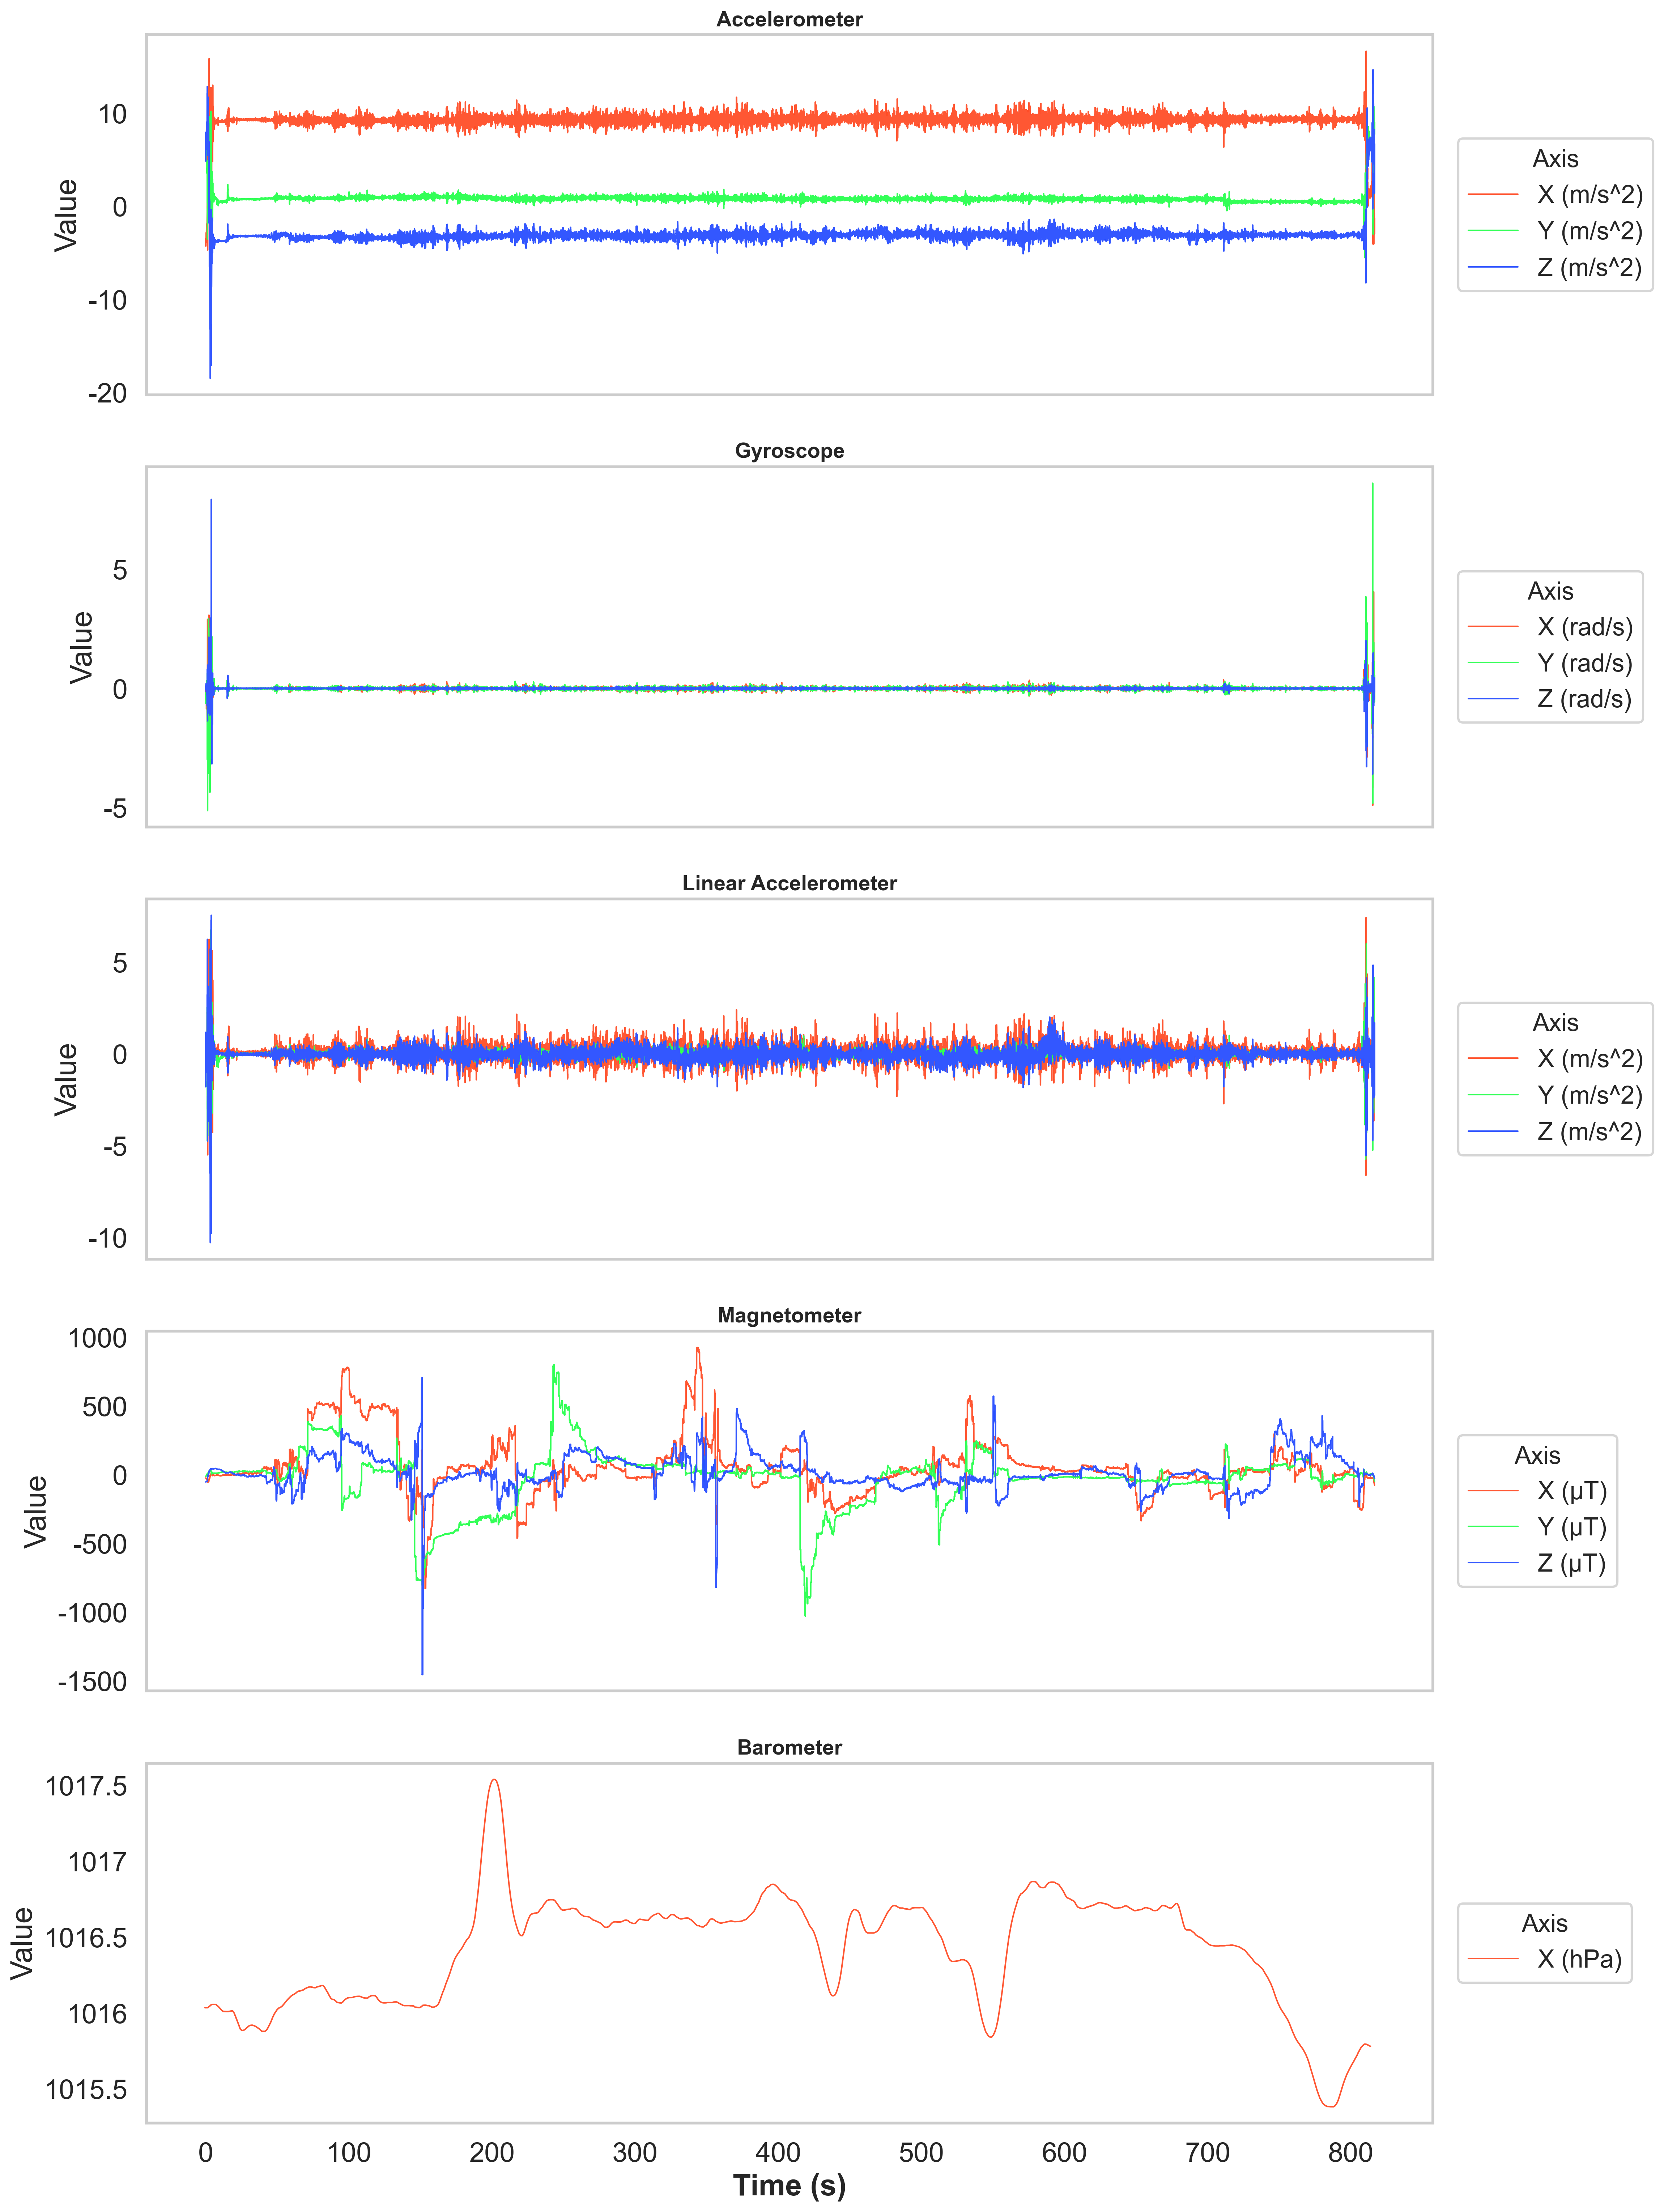

In [30]:
plot_sensor_data(sensor_data_dict_trein_2)

In [31]:
# def create_summary_table(sensor_data_dict, mode_name):
#     summaries = []
#     for sensor_name, df in sensor_data_dict.items():
#         desc = df.describe().T[['mean', 'std', 'min', 'max', 'count']]
#         desc['sensor'] = sensor_name
#         desc['feature'] = desc.index
#         desc['mode'] = mode_name
#         summaries.append(desc.reset_index(drop=True))
    
#     summary_df = pd.concat(summaries, ignore_index=True)
#     summary_df = summary_df[['mode', 'sensor', 'feature', 'count', 'mean', 'std', 'min', 'max']]
#     return summary_df

# # Voorbeeld met meerdere modi
# summary_fietsen = create_summary_table(sensor_data_dict_fietsen, "Bike")
# summary_auto = create_summary_table(sensor_data_dict_auto, "Car")
# summary_runnen = create_summary_table(sensor_data_dict_rennen, "Running")
# summary_trein = create_summary_table(sensor_data_dict_trein, "Train")
# summary_metro = create_summary_table(sensor_data_dict, "Metro")

# # Alles combineren in één grote tabel
# combined_summary = pd.concat([summary_fietsen, summary_auto, summary_metro, summary_trein, summary_runnen], ignore_index=True)

# print(combined_summary.head())
# combined_summary.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\summary_sensor_data.csv", index=False)

### Creëeren dataset

In [32]:
from functools import reduce

In [33]:
def aggregate_sensor_data(sensor_data_dict):
    aggregated_dfs = []

    for name, df in sensor_data_dict.items():
        # Kolomnamen opschonen
        df.columns = [col.strip().strip('"') for col in df.columns]

        # Tijdkolom gebruiken
        time_col = df.columns[0]
        df['second'] = df[time_col].astype(float).astype(int)

        # Gemiddelde per seconde
        df_avg = df.groupby('second').mean().reset_index()

        # Hernoemen van kolommen
        df_avg = df_avg.rename(columns={col: f"{name}_{col}" for col in df_avg.columns if col != 'second'})
        aggregated_dfs.append(df_avg)

    # Merge alles op 'second'
    final_df = reduce(lambda left, right: pd.merge(left, right, on='second', how='outer'), aggregated_dfs)

    # Sorteren en opschonen
    final_df = final_df.sort_values('second').reset_index(drop=True)
    final_df = final_df.rename(columns={'second': 'Time (s)'})
    columns_to_drop = [col for col in final_df.columns if 'Time' in col and col != 'Time (s)']
    final_df = final_df.drop(columns=columns_to_drop)

    return final_df

In [34]:
final_df_metro = aggregate_sensor_data(sensor_data_dict_metro)
final_df_rennen = aggregate_sensor_data(sensor_data_dict_rennen)
final_df_fietsen = aggregate_sensor_data(sensor_data_dict_fietsen)
final_df_trein = aggregate_sensor_data(sensor_data_dict_trein)

final_df_auto_pre = aggregate_sensor_data(sensor_data_dict_auto)
final_df_auto = final_df_auto_pre[final_df_auto_pre['Time (s)'] > 120]

In [35]:
final_df_fietsen_2 = aggregate_sensor_data(sensor_data_dict_fietsen_2)
final_df_auto_2 = aggregate_sensor_data(sensor_data_dict_auto_2)
final_df_rennen_2 = aggregate_sensor_data(sensor_data_dict_rennen_2)
final_df_metro_2 = aggregate_sensor_data(sensor_data_dict_metro_2)
final_df_trein_2 = aggregate_sensor_data(sensor_data_dict_trein_2)

In [36]:
final_df_trein_2.isna().sum()

Time (s)                           0
Accelerometer_X (m/s^2)            0
Accelerometer_Y (m/s^2)            0
Accelerometer_Z (m/s^2)            0
Gyroscope_X (rad/s)                0
Gyroscope_Y (rad/s)                0
Gyroscope_Z (rad/s)                0
Linear Accelerometer_X (m/s^2)     0
Linear Accelerometer_Y (m/s^2)     0
Linear Accelerometer_Z (m/s^2)     0
Magnetometer_X (µT)                0
Magnetometer_Y (µT)                0
Magnetometer_Z (µT)                0
Barometer_X (hPa)                 57
dtype: int64

In [37]:
final_df_metro['Barometer_X (hPa)'] = final_df_metro['Barometer_X (hPa)'].interpolate(method='linear')
final_df_rennen['Barometer_X (hPa)'] = final_df_rennen['Barometer_X (hPa)'].interpolate(method='linear')
final_df_fietsen['Barometer_X (hPa)'] = final_df_fietsen['Barometer_X (hPa)'].interpolate(method='linear')
final_df_trein['Barometer_X (hPa)'] = final_df_trein['Barometer_X (hPa)'].interpolate(method='linear')
final_df_auto['Barometer_X (hPa)'] = final_df_auto['Barometer_X (hPa)'].interpolate(method='linear')

C:\Users\jdrij\AppData\Local\Temp\ipykernel_19328\2315315235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_auto['Barometer_X (hPa)'] = final_df_auto['Barometer_X (hPa)'].interpolate(method='linear')


In [38]:
final_df_fietsen_2['Barometer_X (hPa)'] = final_df_fietsen_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_auto_2['Barometer_X (hPa)'] = final_df_auto_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_rennen_2['Barometer_X (hPa)'] = final_df_rennen_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_metro_2['Barometer_X (hPa)'] = final_df_metro_2['Barometer_X (hPa)'].interpolate(method='linear')
final_df_trein_2['Barometer_X (hPa)'] = final_df_trein_2['Barometer_X (hPa)'].interpolate(method='linear')

In [39]:
final_df_metro = final_df_metro[(final_df_metro['Time (s)'] > 20) & (final_df_metro['Time (s)'] < final_df_metro['Time (s)'].max() - 20)]
final_df_rennen = final_df_rennen[(final_df_rennen['Time (s)'] > 20) & (final_df_rennen['Time (s)'] < final_df_rennen['Time (s)'].max() - 20)]
final_df_fietsen = final_df_fietsen[(final_df_fietsen['Time (s)'] > 20) & (final_df_fietsen['Time (s)'] < final_df_fietsen['Time (s)'].max() - 20)]
final_df_trein = final_df_trein[(final_df_trein['Time (s)'] > 20) & (final_df_trein['Time (s)'] < final_df_trein['Time (s)'].max() - 20)]
final_df_auto = final_df_auto[(final_df_auto['Time (s)'] > 20) & (final_df_auto['Time (s)'] < final_df_auto['Time (s)'].max() - 20)]

In [40]:
final_df_fietsen_2 = final_df_fietsen_2[(final_df_fietsen_2['Time (s)'] > 20) & (final_df_fietsen_2['Time (s)'] < final_df_fietsen_2['Time (s)'].max() - 20)]
final_df_auto_2 = final_df_auto_2[(final_df_auto_2['Time (s)'] > 20) & (final_df_auto_2['Time (s)'] < final_df_auto_2['Time (s)'].max() - 20)]
final_df_rennen_2 = final_df_rennen_2[(final_df_rennen_2['Time (s)'] > 20) & (final_df_rennen_2['Time (s)'] < final_df_rennen_2['Time (s)'].max() - 20)]
final_df_metro_2 = final_df_metro_2[(final_df_metro_2['Time (s)'] > 20) & (final_df_metro_2['Time (s)'] < final_df_metro_2['Time (s)'].max() - 20)]
final_df_trein_2 = final_df_trein_2[(final_df_trein_2['Time (s)'] > 20) & (final_df_trein_2['Time (s)'] < final_df_trein_2['Time (s)'].max() - 20)]

In [41]:
final_df_trein_2.isna().sum().sort_values(ascending=False)

Time (s)                          0
Accelerometer_X (m/s^2)           0
Accelerometer_Y (m/s^2)           0
Accelerometer_Z (m/s^2)           0
Gyroscope_X (rad/s)               0
Gyroscope_Y (rad/s)               0
Gyroscope_Z (rad/s)               0
Linear Accelerometer_X (m/s^2)    0
Linear Accelerometer_Y (m/s^2)    0
Linear Accelerometer_Z (m/s^2)    0
Magnetometer_X (µT)               0
Magnetometer_Y (µT)               0
Magnetometer_Z (µT)               0
Barometer_X (hPa)                 0
dtype: int64

In [42]:
sensor_columns = [
    'Accelerometer_X (m/s^2)', 'Accelerometer_Y (m/s^2)', 'Accelerometer_Z (m/s^2)',
    'Gyroscope_X (rad/s)', 'Gyroscope_Y (rad/s)', 'Gyroscope_Z (rad/s)',
    'Linear Accelerometer_X (m/s^2)', 'Linear Accelerometer_Y (m/s^2)', 'Linear Accelerometer_Z (m/s^2)',
    'Magnetometer_X (µT)', 'Magnetometer_Y (µT)', 'Magnetometer_Z (µT)',
    'Barometer_X (hPa)'
]

In [43]:
from remove_noise import apply_kalman_filter

In [44]:
def kalman_filter(df):
    for col in sensor_columns:
        if col in df.columns:
            df[f"{col}_kalman"] = apply_kalman_filter(df[col])
    # Alleen Kalman-kolommen + Time
    filtered_cols = ["Time (s)"] + [f"{col}_kalman" for col in sensor_columns if f"{col}_kalman" in df.columns]
    df_filtered = df[filtered_cols]
    return df_filtered

In [45]:
metro_copy = final_df_metro.copy()
trein_copy = final_df_trein.copy()
rennen_copy = final_df_rennen.copy()
fietsen_copy = final_df_fietsen.copy()
auto_copy = final_df_auto.copy()

In [46]:
metro2_copy = final_df_metro_2.copy()
trein2_copy = final_df_trein_2.copy()
rennen2_copy = final_df_rennen_2.copy()
fietsen2_copy = final_df_fietsen_2.copy()
auto2_copy = final_df_auto_2.copy()

In [47]:
metro_kalman = kalman_filter(metro_copy)
trein_kalman = kalman_filter(trein_copy)
rennen_kalman = kalman_filter(rennen_copy)
fietsen_kalman = kalman_filter(fietsen_copy)
auto_kalman = kalman_filter(auto_copy)

In [48]:
metro2_kalman = kalman_filter(metro2_copy)
trein2_kalman = kalman_filter(trein2_copy)
rennen2_kalman = kalman_filter(rennen2_copy)
fietsen2_kalman = kalman_filter(fietsen2_copy)
auto2_kalman = kalman_filter(auto2_copy)

In [49]:
metro2_kalman

,Time (s),Accelerometer_X (m/s^2)_kalman,Accelerometer_Y (m/s^2)_kalman,Accelerometer_Z (m/s^2)_kalman,Gyroscope_X (rad/s)_kalman,Gyroscope_Y (rad/s)_kalman,Gyroscope_Z (rad/s)_kalman,Linear Accelerometer_X (m/s^2)_kalman,Linear Accelerometer_Y (m/s^2)_kalman,Linear Accelerometer_Z (m/s^2)_kalman,Magnetometer_X (µT)_kalman,Magnetometer_Y (µT)_kalman,Magnetometer_Z (µT)_kalman,Barometer_X (hPa)_kalman
21,21,7.564326,-1.360703,-6.044850,0.000118,-0.000267,-0.000390,-0.028037,0.002540,0.014054,-27.878399,-17.509846,36.558702,1007.827072
22,22,7.575052,-1.365090,-6.036594,-0.000147,0.002503,0.001957,-0.021997,0.004645,0.016723,-28.662742,-16.833902,37.158522,1007.824957
23,23,7.571440,-1.365830,-6.040329,0.005054,-0.002079,-0.004069,-0.021269,0.005473,0.017953,-27.489039,-17.771376,36.019811,1007.823513
24,24,7.561991,-1.364407,-6.051482,0.002614,-0.001321,-0.002301,-0.025887,0.002958,0.013710,-26.354497,-18.640876,35.019547,1007.822611
25,25,7.561041,-1.361913,-6.052492,0.001828,-0.000551,-0.001296,-0.025372,0.002972,0.015022,-25.937344,-18.559351,34.743776,1007.821802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,792,7.438344,-1.908855,-6.051651,-0.005054,0.010449,0.004298,0.023101,0.034618,0.055119,19.579706,-39.087249,15.450483,1007.923578
793,793,7.500357,-1.903047,-5.977560,-0.004799,0.008839,0.003825,0.031572,0.036797,0.066735,18.867526,-40.281820,15.535297,1007.917973
794,794,7.555952,-1.901478,-5.916490,-0.004181,0.006792,0.003319,0.040005,0.036250,0.072490,18.429987,-41.500258,15.866636,1007.912234
795,795,7.597625,-1.895544,-5.864323,-0.004661,0.002250,-0.000396,0.041276,0.036333,0.077243,17.672705,-40.727638,15.760380,1007.908045


## Lagged features

In [50]:
def add_lagged_features(df, lags=[1, 3, 10]):
    """
    Voeg lagged statistical features toe:
    - std voor lags > 1
    - mean voor niet-gyroscoop features
    - sum voor gyroscoop features
    Kolomnamen met eenheden worden gestandaardiseerd.
    """
    rename_map = {
        "Accelerometer_X (m/s^2)_kalman": "Accelerometer_X",
        "Accelerometer_Y (m/s^2)_kalman": "Accelerometer_Y",
        "Accelerometer_Z (m/s^2)_kalman": "Accelerometer_Z",
        "Gyroscope_X (rad/s)_kalman": "Gyroscope_X",
        "Gyroscope_Y (rad/s)_kalman": "Gyroscope_Y",
        "Gyroscope_Z (rad/s)_kalman": "Gyroscope_Z",
        "Linear Accelerometer_X (m/s^2)_kalman": "Linear_Accelerometer_X",
        "Linear Accelerometer_Y (m/s^2)_kalman": "Linear_Accelerometer_Y",
        "Linear Accelerometer_Z (m/s^2)_kalman": "Linear_Accelerometer_Z",
        "Magnetometer_X (µT)_kalman": "Magnetometer_X",
        "Magnetometer_Y (µT)_kalman": "Magnetometer_Y",
        "Magnetometer_Z (µT)_kalman": "Magnetometer_Z",
        "Barometer_X (hPa)_kalman": "Barometer_X",
        "Time (s)": "Time"
    }


    # Kolomnamen opschonen en hernoemen
    df.columns = df.columns.str.strip()
    df = df.rename(columns=rename_map)

    gyroscope_cols = ["Gyroscope_X", "Gyroscope_Y", "Gyroscope_Z"]
    all_feature_cols = [col for col in rename_map.values() if not col.startswith('Time')]
    non_gyro_cols = [col for col in all_feature_cols if col not in gyroscope_cols]

    for col in all_feature_cols:
        if col not in df.columns:
            print(f"⚠️ Kolom '{col}' ontbreekt in DataFrame. Sla over.")
            continue

        for lag in lags:
            # Alleen std voor lag > 1
            if lag > 1:
                df[f"{col}_std_{lag}"] = df[col].rolling(window=lag).std()

            if col in non_gyro_cols:
                df[f"{col}_mean_{lag}"] = df[col].rolling(window=lag).mean()

            if col in gyroscope_cols:
                df[f"{col}_sum_{lag}"] = df[col].rolling(window=lag).sum()

    #df.dropna(inplace=True)
    return df

In [51]:
# def add_lagged_features_2(df, lags=[1, 3, 10]):
#     """
#     Voeg lagged statistical features toe:
#     - std voor lags > 1
#     - mean voor niet-gyroscoop features
#     - sum voor gyroscoop features
#     Kolomnamen met eenheden worden gestandaardiseerd.
#     """
#     rename_map = {
#         "Accelerometer_X (m/s^2)": "Accelerometer_X",
#         "Accelerometer_Y (m/s^2)": "Accelerometer_Y",
#         "Accelerometer_Z (m/s^2)": "Accelerometer_Z",
#         "Gyroscope_X (rad/s)": "Gyroscope_X",
#         "Gyroscope_Y (rad/s)": "Gyroscope_Y",
#         "Gyroscope_Z (rad/s)": "Gyroscope_Z",
#         "Linear Accelerometer_X (m/s^2)": "Linear Accelerometer_X",
#         "Linear Accelerometer_Y (m/s^2)": "Linear Accelerometer_Y",
#         "Linear Accelerometer_Z (m/s^2)": "Linear Accelerometer_Z",
#         "Magnetometer_X (µT)": "Magnetometer_X",
#         "Magnetometer_Y (µT)": "Magnetometer_Y",
#         "Magnetometer_Z (µT)": "Magnetometer_Z",
#         "Barometer_X (hPa)": "Barometer_X"
#     }

#     # Kolomnamen opschonen en hernoemen
#     df.columns = df.columns.str.strip()
#     df = df.rename(columns=rename_map)

#     gyroscope_cols = ["Gyroscope_X", "Gyroscope_Y", "Gyroscope_Z"]
#     all_feature_cols = [col for col in rename_map.values() if not col.startswith('Time')]
#     non_gyro_cols = [col for col in all_feature_cols if col not in gyroscope_cols]

#     for col in all_feature_cols:
#         if col not in df.columns:
#             print(f"⚠️ Kolom '{col}' ontbreekt in DataFrame. Sla over.")
#             continue

#         for lag in lags:
#             # Alleen std voor lag > 1
#             if lag > 1:
#                 df[f"{col}_std_{lag}"] = df[col].rolling(window=lag).std()

#             if col in non_gyro_cols:
#                 df[f"{col}_mean_{lag}"] = df[col].rolling(window=lag).mean()

#             if col in gyroscope_cols:
#                 df[f"{col}_sum_{lag}"] = df[col].rolling(window=lag).sum()

#     #df.dropna(inplace=True)
#     return df


In [52]:
metro = add_lagged_features(metro_kalman).iloc[9:]
rennen = add_lagged_features(rennen_kalman).iloc[9:]
fietsen = add_lagged_features(fietsen_kalman).iloc[9:]
trein = add_lagged_features(trein_kalman).iloc[9:]
auto = add_lagged_features(auto_kalman).iloc[9:]

In [53]:
fietsen2 = add_lagged_features(fietsen2_kalman).iloc[9:]
auto2 = add_lagged_features(auto2_kalman).iloc[9:]
rennen2 = add_lagged_features(rennen2_kalman).iloc[9:]
metro2 = add_lagged_features(metro2_kalman).iloc[9:]
trein2 = add_lagged_features(trein2_kalman).iloc[9:]

In [54]:
metro['acc_magnitude'] = np.sqrt(metro['Accelerometer_X']**2 + metro['Accelerometer_Y']**2 + metro['Accelerometer_Z']**2)
rennen['acc_magnitude'] = np.sqrt(rennen['Accelerometer_X']**2 + rennen['Accelerometer_Y']**2 + rennen['Accelerometer_Z']**2)
fietsen['acc_magnitude'] = np.sqrt(fietsen['Accelerometer_X']**2 + fietsen['Accelerometer_Y']**2 + fietsen['Accelerometer_Z']**2)
trein['acc_magnitude'] = np.sqrt(trein['Accelerometer_X']**2 + trein['Accelerometer_Y']**2 + trein['Accelerometer_Z']**2)
auto['acc_magnitude'] = np.sqrt(auto['Accelerometer_X']**2 + auto['Accelerometer_Y']**2 + auto['Accelerometer_Z']**2)

In [55]:
metro2['acc_magnitude'] = np.sqrt(metro2['Accelerometer_X']**2 + metro2['Accelerometer_Y']**2 + metro2['Accelerometer_Z']**2)
rennen2['acc_magnitude'] = np.sqrt(rennen2['Accelerometer_X']**2 + rennen2['Accelerometer_Y']**2 + rennen2['Accelerometer_Z']**2)
fietsen2['acc_magnitude'] = np.sqrt(fietsen2['Accelerometer_X']**2 + fietsen2['Accelerometer_Y']**2 + fietsen2['Accelerometer_Z']**2)
trein2['acc_magnitude'] = np.sqrt(trein2['Accelerometer_X']**2 + trein2['Accelerometer_Y']**2 + trein2['Accelerometer_Z']**2)
auto2['acc_magnitude'] = np.sqrt(auto2['Accelerometer_X']**2 + auto2['Accelerometer_Y']**2 + auto2['Accelerometer_Z']**2)

In [56]:
metro['Linear_acc_magnitude'] = np.sqrt(metro['Linear_Accelerometer_X']**2 + metro['Linear_Accelerometer_Y']**2 + metro['Linear_Accelerometer_Z']**2)
rennen['Linear_acc_magnitude'] = np.sqrt(rennen['Linear_Accelerometer_X']**2 + rennen['Linear_Accelerometer_Y']**2 + rennen['Linear_Accelerometer_Z']**2)
fietsen['Linear_acc_magnitude'] = np.sqrt(fietsen['Linear_Accelerometer_X']**2 + fietsen['Linear_Accelerometer_Y']**2 + fietsen['Linear_Accelerometer_Z']**2)
trein['Linear_acc_magnitude'] = np.sqrt(trein['Linear_Accelerometer_X']**2 + trein['Linear_Accelerometer_Y']**2 + trein['Linear_Accelerometer_Z']**2)
auto['Linear_acc_magnitude'] = np.sqrt(auto['Linear_Accelerometer_X']**2 + auto['Linear_Accelerometer_Y']**2 + auto['Linear_Accelerometer_Z']**2)

In [57]:
metro2['Linear_acc_magnitude'] = np.sqrt(metro2['Linear_Accelerometer_X']**2 + metro2['Linear_Accelerometer_Y']**2 + metro2['Linear_Accelerometer_Z']**2)
rennen2['Linear_acc_magnitude'] = np.sqrt(rennen2['Linear_Accelerometer_X']**2 + rennen2['Linear_Accelerometer_Y']**2 + rennen2['Linear_Accelerometer_Z']**2)
fietsen2['Linear_acc_magnitude'] = np.sqrt(fietsen2['Linear_Accelerometer_X']**2 + fietsen2['Linear_Accelerometer_Y']**2 + fietsen2['Linear_Accelerometer_Z']**2)       
trein2['Linear_acc_magnitude'] = np.sqrt(trein2['Linear_Accelerometer_X']**2 + trein2['Linear_Accelerometer_Y']**2 + trein2['Linear_Accelerometer_Z']**2)
auto2['Linear_acc_magnitude'] = np.sqrt(auto2['Linear_Accelerometer_X']**2 + auto2['Linear_Accelerometer_Y']**2 + auto2['Linear_Accelerometer_Z']**2)

In [58]:
metro2.isna().sum().sort_values(ascending=False)

Time                              0
Gyroscope_Z_sum_3                 0
Magnetometer_X_mean_1             0
Linear_Accelerometer_Z_mean_10    0
Linear_Accelerometer_Z_std_10     0
                                 ..
Accelerometer_Z_mean_3            0
Accelerometer_Z_std_3             0
Accelerometer_Z_mean_1            0
Accelerometer_Y_mean_10           0
Linear_acc_magnitude              0
Length: 81, dtype: int64

Label

In [59]:
metro['transport_mode'] = 'metro'
rennen['transport_mode'] = 'rennen'
fietsen['transport_mode'] = 'fietsen'
trein['transport_mode'] = 'trein'
auto['transport_mode'] = 'auto'

In [60]:
fietsen2['transport_mode'] = 'fietsen'
auto2['transport_mode'] = 'auto'
rennen2['transport_mode'] = 'rennen'
metro2['transport_mode'] = 'metro'
trein2['transport_mode'] = 'trein'

In [61]:
print(len(fietsen['Time']))
print(len(auto['Time']))
print(len(rennen['Time']))
print(len(trein['Time']))
print(len(metro['Time']))

756
1131
1244
933
845


In [62]:
print(len(fietsen2['Time']))
print(len(auto2['Time']))
print(len(rennen2['Time']))
print(len(trein2['Time']))
print(len(metro2['Time']))

795
979
910
766
767


In [63]:
train_metro = metro.iloc[:750].copy()
train_rennen = rennen.iloc[:750].copy()
train_fietsen = fietsen.iloc[:750].copy()
train_trein = trein.iloc[:750].copy()
train_auto = auto.iloc[:750].copy()

In [64]:
print("Max Time (s) values for each DataFrame:")
print("train_rennen:", len(train_rennen["Time"]))
print("train_fietsen:", len(train_fietsen["Time"]))
print("train_trein:", len(train_trein["Time"]))
print("train_auto:", len(train_auto["Time"]))
print("train_metro:", len(train_metro["Time"]))

Max Time (s) values for each DataFrame:
train_rennen: 750
train_fietsen: 750
train_trein: 750
train_auto: 750
train_metro: 750


In [65]:
test_fietsen2 = fietsen2[:750].copy()
test_auto2 = auto2[:750].copy()
test_rennen2 = rennen2[:750].copy()
test_metro2 = metro2[:750].copy()
test_trein2 = trein2[:750].copy()

In [66]:
print("Max Time (s) values for each DataFrame:")
print("test_fietsen2:", len(test_fietsen2["Time"]))
print("test_auto2:", len(test_auto2["Time"]))
print("test_rennen2:", len(test_rennen2["Time"]))   
print("test_metro2:", len(test_metro2["Time"]))
print("test_trein2:", len(test_trein2["Time"]))

Max Time (s) values for each DataFrame:
test_fietsen2: 750
test_auto2: 750
test_rennen2: 750
test_metro2: 750
test_trein2: 750


Train/test 

In [67]:
train_df = pd.concat([train_metro, train_rennen, train_fietsen, train_trein, train_auto], ignore_index=True)

In [68]:
test_df = pd.concat([test_metro2, test_rennen2, test_fietsen2, test_trein2, test_auto2], ignore_index=True)

In [69]:
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Verschillen vinden
only_in_train = train_columns - test_columns
only_in_test = test_columns - train_columns

print("Kolommen die alleen in train_df_all staan:", only_in_train)
print("Kolommen die alleen in test_df staan:", only_in_test)

Kolommen die alleen in train_df_all staan: set()
Kolommen die alleen in test_df staan: set()


In [70]:
# train_df.columns = train_df.columns.str.replace(' ', '_')
# test_df.columns = test_df.columns.str.replace(' ', '_')

In [71]:
from IPython.display import display, HTML

# Calculate missing values
missing_values = test_df.isna().sum().sort_values(ascending=False)

# Convert to DataFrame for better display
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'Missing Count']

# Display with scroll
display(HTML(missing_df.to_html(max_rows=20, notebook=True)))

,Feature,Missing Count
0,Time,0
1,Magnetometer_X_mean_3,0
2,Magnetometer_X_mean_1,0
3,Linear_Accelerometer_Z_mean_10,0
4,Linear_Accelerometer_Z_std_10,0
5,Linear_Accelerometer_Z_mean_3,0
6,Linear_Accelerometer_Z_std_3,0
7,Linear_Accelerometer_Z_mean_1,0
8,Linear_Accelerometer_Y_mean_10,0
9,Linear_Accelerometer_Y_std_10,0


### Models

Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop 'Time' and split features/labels
X_train_logreg = train_df.drop(columns=['transport_mode', 'Time'])
y_train_logreg = train_df['transport_mode']

X_test_logreg = test_df.drop(columns=['transport_mode', 'Time'])
y_test_logreg = test_df['transport_mode']

# Encode labels
logreg_label_encoder = LabelEncoder()
y_train_logreg_enc = logreg_label_encoder.fit_transform(y_train_logreg)
y_test_logreg_enc = logreg_label_encoder.transform(y_test_logreg)

# Normalize features
scaler_logreg = StandardScaler()
X_train_logreg_scaled = scaler_logreg.fit_transform(X_train_logreg)
X_test_logreg_scaled = scaler_logreg.transform(X_test_logreg)

# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_logreg_scaled, y_train_logreg_enc)

# Predictions
y_pred_logreg = logreg_model.predict(X_test_logreg_scaled)

# Evaluation
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test_logreg_enc, y_pred_logreg, target_names=logreg_label_encoder.classes_))

accuracy_logreg = accuracy_score(y_test_logreg_enc, y_pred_logreg)
print("Accuracy:", round(accuracy_logreg * 100, 2), "%")


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

        auto       0.51      1.00      0.67       750
     fietsen       0.00      0.00      0.00       750
       metro       0.52      0.53      0.52       750
      rennen       1.00      0.93      0.97       750
       trein       0.14      0.10      0.12       750

    accuracy                           0.51      3750
   macro avg       0.43      0.51      0.46      3750
weighted avg       0.43      0.51      0.46      3750

Accuracy: 51.36 %


KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop 'Time' and split features/labels
X_train_knn = train_df.drop(columns=['transport_mode', 'Time'])
y_train_knn = train_df['transport_mode']

X_test_knn = test_df.drop(columns=['transport_mode', 'Time'])
y_test_knn = test_df['transport_mode']

# Encode labels
knn_label_encoder = LabelEncoder()
y_train_knn_enc = knn_label_encoder.fit_transform(y_train_knn)
y_test_knn_enc = knn_label_encoder.transform(y_test_knn)

# Normalize features
scaler = StandardScaler()
X_train_knn_scaled = scaler.fit_transform(X_train_knn)
X_test_knn_scaled = scaler.transform(X_test_knn)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this value
knn_model.fit(X_train_knn_scaled, y_train_knn_enc)

# Predictions
y_pred_knn = knn_model.predict(X_test_knn_scaled)

# Evaluation
print("=== K-Nearest Neighbors Classification Report ===")
print(classification_report(y_test_knn_enc, y_pred_knn, target_names=knn_label_encoder.classes_))

accuracy_knn = accuracy_score(y_test_knn_enc, y_pred_knn)
print("Accuracy:", round(accuracy_knn * 100, 2), "%")

=== K-Nearest Neighbors Classification Report ===
              precision    recall  f1-score   support

        auto       0.69      0.98      0.81       750
     fietsen       0.00      0.00      0.00       750
       metro       0.54      0.58      0.56       750
      rennen       1.00      0.99      0.99       750
       trein       0.21      0.25      0.23       750

    accuracy                           0.56      3750
   macro avg       0.49      0.56      0.52      3750
weighted avg       0.49      0.56      0.52      3750

Accuracy: 55.81 %


Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Drop 'Time' and split features/labels
X_train_dt = train_df.drop(columns=['transport_mode', 'Time'])
y_train_dt = train_df['transport_mode']

X_test_dt = test_df.drop(columns=['transport_mode', 'Time'])
y_test_dt = test_df['transport_mode']

# Encode labels
dt_label_encoder = LabelEncoder()
y_train_dt_enc = dt_label_encoder.fit_transform(y_train_dt)
y_test_dt_enc = dt_label_encoder.transform(y_test_dt)

# # Normalize features
# scaler = StandardScaler()
# X_train_dt_scaled = scaler.fit_transform(X_train_dt)
# X_test_dt_scaled = scaler.transform(X_test_dt)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt_enc)

# Predictions
y_pred_dt = dt_model.predict(X_test_dt)

# Evaluation
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test_dt_enc, y_pred_dt, target_names=dt_label_encoder.classes_))

accuracy_dt = accuracy_score(y_test_dt_enc, y_pred_dt)
print("Accuracy:", round(accuracy_dt * 100, 2), "%")


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

        auto       0.00      0.00      0.00       750
     fietsen       0.00      0.00      0.00       750
       metro       0.00      0.00      0.00       750
      rennen       1.00      0.07      0.14       750
       trein       0.25      1.00      0.41       750

    accuracy                           0.21      3750
   macro avg       0.25      0.21      0.11      3750
weighted avg       0.25      0.21      0.11      3750

Accuracy: 21.49 %


c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

XGBoost

In [75]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Features en labels splitsen
X_train_xgb = train_df.drop(columns=['transport_mode', 'Time'])  # drop Time en label
y_train_xgb = train_df['transport_mode']

X_test_xgb = test_df.drop(columns=['transport_mode', 'Time'])
y_test_xgb = test_df['transport_mode']

# Encode labels (strings → integers)
le_xgb = LabelEncoder()
y_train_enc_xgb= le_xgb.fit_transform(y_train_xgb)
y_test_enc_xgb = le_xgb.transform(y_test_xgb)

label_mapping_xgb = dict(zip(le_xgb.classes_, range(len(le_xgb.classes_))))
print("Label to integer mapping:", label_mapping_xgb)

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train_xgb, y_train_enc_xgb)

y_pred_xgb = model_xgb.predict(X_test_xgb)
print(classification_report(y_test_enc_xgb, y_pred_xgb, target_names=le_xgb.classes_))


Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}


c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        auto       0.49      1.00      0.66       750
     fietsen       0.13      0.01      0.02       750
       metro       0.51      1.00      0.68       750
      rennen       1.00      0.29      0.45       750
       trein       0.00      0.00      0.00       750

    accuracy                           0.46      3750
   macro avg       0.43      0.46      0.36      3750
weighted avg       0.43      0.46      0.36      3750



In [76]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_xgb = accuracy_score(y_test_enc_xgb, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")


Accuracy: 0.4605


In [77]:
print("Train accuracy:", model_xgb.score(X_train_xgb, y_train_enc_xgb))

Train accuracy: 1.0


In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a DataFrame comparing actual vs predicted values
comparison_df_xgb = pd.DataFrame({
    'Actual': y_test_enc_xgb,
    'Predicted': y_pred_xgb
})

# Add readable label names
comparison_df_xgb['Actual_Label'] = le_xgb.inverse_transform(comparison_df_xgb['Actual'])
comparison_df_xgb['Predicted_Label'] = le_xgb.inverse_transform(comparison_df_xgb['Predicted'])

# Show a sample of comparisons
print("=== XGBoost Prediction Comparison ===")
print(comparison_df_xgb.head(10))

# Count correct predictions
correct_xgb = (comparison_df_xgb['Actual'] == comparison_df_xgb['Predicted']).sum()
total_xgb = len(comparison_df_xgb)
incorrect_xgb = total_xgb - correct_xgb
accuracy_xgb = accuracy_score(y_test_enc_xgb, y_pred_xgb)

# Summary
print(f"\nTotal predictions: {total_xgb}")
print(f"Correct predictions: {correct_xgb}")
print(f"Incorrect predictions: {incorrect_xgb}")
print(f"Accuracy: {accuracy_xgb:.4f}")

=== XGBoost Prediction Comparison ===
   Actual  Predicted Actual_Label Predicted_Label
0       2          2        metro           metro
1       2          2        metro           metro
2       2          2        metro           metro
3       2          2        metro           metro
4       2          2        metro           metro
5       2          2        metro           metro
6       2          2        metro           metro
7       2          2        metro           metro
8       2          2        metro           metro
9       2          2        metro           metro

Total predictions: 3750
Correct predictions: 1727
Incorrect predictions: 2023
Accuracy: 0.4605


Randomforest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Features en labels splitsen
X_train_rf = train_df.drop(columns=['transport_mode', 'Time'])
y_train_rf = train_df['transport_mode']

X_test_rf = test_df.drop(columns=['transport_mode', 'Time'])
y_test_rf = test_df['transport_mode']

# Encode labels (strings → integers)
rf_label_encoder = LabelEncoder()
y_train_rf_enc = rf_label_encoder.fit_transform(y_train_rf)
y_test_rf_enc = rf_label_encoder.transform(y_test_rf)

# Mapping afdrukken
rf_label_mapping = dict(zip(rf_label_encoder.classes_, range(len(rf_label_encoder.classes_))))
print("RandomForest - Label to integer mapping:", rf_label_mapping)

# Train het RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf_enc)

# Voorspellingen doen
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluatie
print("=== RandomForest Classification Report ===")
print(classification_report(y_test_rf_enc, y_pred_rf, target_names=rf_label_encoder.classes_))


RandomForest - Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}
=== RandomForest Classification Report ===
              precision    recall  f1-score   support

        auto       0.33      1.00      0.50       750
     fietsen       0.00      0.00      0.00       750
       metro       0.00      0.00      0.00       750
      rennen       1.00      0.04      0.08       750
       trein       0.00      0.00      0.00       750

    accuracy                           0.21      3750
   macro avg       0.27      0.21      0.12      3750
weighted avg       0.27      0.21      0.12      3750



In [80]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_rf = accuracy_score(y_test_rf_enc, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")


Accuracy: 0.2080


In [81]:
comparison_df = pd.DataFrame({
    'Actual': y_test_rf_enc,
    'Predicted': y_pred_rf
})

# Add the label names for readability
comparison_df['Actual_Label'] = rf_label_encoder.inverse_transform(comparison_df['Actual'])
comparison_df['Predicted_Label'] = rf_label_encoder.inverse_transform(comparison_df['Predicted'])

# Print the first few rows
print("=== Prediction Comparison ===")
print(comparison_df.head(10))

# Count correct and incorrect predictions
correct = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
total = len(comparison_df)
incorrect = total - correct
accuracy = accuracy_score(y_test_rf_enc, y_pred_rf)

# Print summary
print(f"\nTotal predictions: {total}")
print(f"Correct predictions: {correct}")
print(f"Incorrect predictions: {incorrect}")
print(f"Accuracy: {accuracy:.4f}")

=== Prediction Comparison ===
   Actual  Predicted Actual_Label Predicted_Label
0       2          0        metro            auto
1       2          0        metro            auto
2       2          0        metro            auto
3       2          0        metro            auto
4       2          0        metro            auto
5       2          0        metro            auto
6       2          0        metro            auto
7       2          0        metro            auto
8       2          0        metro            auto
9       2          0        metro            auto

Total predictions: 3750
Correct predictions: 780
Incorrect predictions: 2970
Accuracy: 0.2080


Catboost

In [82]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Input/output preparation
catboost_features_train = train_df.drop(columns=['transport_mode', 'Time'])
catboost_labels_train = train_df['transport_mode']

catboost_features_test = test_df.drop(columns=['transport_mode', 'Time'])
catboost_labels_test = test_df['transport_mode']

# Encode target labels
catboost_label_encoder = LabelEncoder()
catboost_y_train = catboost_label_encoder.fit_transform(catboost_labels_train)
catboost_y_test = catboost_label_encoder.transform(catboost_labels_test)

# Label mapping
catboost_label_dict = dict(zip(catboost_label_encoder.classes_, range(len(catboost_label_encoder.classes_))))
print("CatBoost - Label to integer mapping:", catboost_label_dict)

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42, iterations=300, learning_rate=0.1, depth=6)
catboost_model.fit(catboost_features_train, catboost_y_train)

# Make predictions
catboost_predictions = catboost_model.predict(catboost_features_test)

# Evaluation
print("=== CatBoost Classification Report ===")
print(classification_report(catboost_y_test, catboost_predictions, target_names=catboost_label_encoder.classes_))


CatBoost - Label to integer mapping: {'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}
=== CatBoost Classification Report ===
              precision    recall  f1-score   support

        auto       0.97      1.00      0.98       750
     fietsen       0.00      0.00      0.00       750
       metro       0.37      0.91      0.52       750
      rennen       1.00      0.37      0.54       750
       trein       0.00      0.00      0.00       750

    accuracy                           0.45      3750
   macro avg       0.47      0.45      0.41      3750
weighted avg       0.47      0.45      0.41      3750



In [83]:
# Accuracy
accuracy_catboost = accuracy_score(catboost_y_test, catboost_predictions)
print(f"Accuracy: {accuracy_catboost:.4f}")


Accuracy: 0.4547


In [84]:
feature_names = X_train_xgb.columns

# Haal de importances op
importances = model_xgb.feature_importances_

# Zet om naar DataFrame voor overzicht
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [85]:
importance_df[importance_df['Importance'] > 0]

,Feature,Importance
78,acc_magnitude,0.349215
11,Magnetometer_Z,0.145062
15,Accelerometer_X_mean_3,0.109011
20,Accelerometer_Y_mean_3,0.073393
27,Accelerometer_Z_mean_10,0.062475
22,Accelerometer_Y_mean_10,0.045354
0,Accelerometer_X,0.044427
12,Barometer_X,0.043704
1,Accelerometer_Y,0.037664
77,Barometer_X_mean_10,0.023761


LSTM


In [86]:
train_df_basic = train_df[train_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]
test_df_basic = test_df[test_df.columns[:11].tolist() + ['transport_mode', 'acc_magnitude', 'Linear_acc_magnitude']]

In [87]:
le_lstm = LabelEncoder()
train_df_basic['label'] = le_lstm.fit_transform(train_df_basic['transport_mode'])
test_df_basic['label'] = le_lstm.transform(test_df_basic['transport_mode'])

# Optional: see the label mapping
label_mapping = dict(zip(le_lstm.classes_, le_lstm.transform(le_lstm.classes_)))
print(label_mapping)

{'auto': 0, 'fietsen': 1, 'metro': 2, 'rennen': 3, 'trein': 4}


C:\Users\jdrij\AppData\Local\Temp\ipykernel_19328\1287304869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_basic['label'] = le_lstm.fit_transform(train_df_basic['transport_mode'])
C:\Users\jdrij\AppData\Local\Temp\ipykernel_19328\1287304869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_basic['label'] = le_lstm.transform(test_df_basic['transport_mode'])


In [88]:
import numpy as np

def create_sequences(df, feature_cols, label_col, window_size=10):
    X, y = [], []
    for i in range(len(df) - window_size):
        seq_x = df[feature_cols].iloc[i:i+window_size].values
        seq_y = df[label_col].iloc[i+window_size]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [89]:
feature_cols = train_df_basic.columns[:11].tolist()

X_train_lstm, y_train_lstm = create_sequences(train_df_basic, feature_cols, 'label', window_size=10)
X_test_lstm, y_test_lstm = create_sequences(test_df_basic, feature_cols, 'label', window_size=10)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(len(np.unique(y_train_lstm)), activation='softmax'))

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\jdrij\anaconda3\envs\condaenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4242 - loss: 1.4637 - val_accuracy: 0.2882 - val_loss: 1.7779
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8774 - loss: 0.7011 - val_accuracy: 0.3056 - val_loss: 2.2111
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9972 - loss: 0.0903 - val_accuracy: 0.3289 - val_loss: 2.6118
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9985 - loss: 0.0289 - val_accuracy: 0.3307 - val_loss: 2.7840
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9997 - loss: 0.0127 - val_accuracy: 0.3142 - val_loss: 3.0524
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9991 - loss: 0.0131 - val_accuracy: 0.3500 - val_loss: 3.0611
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0089 - val_accuracy: 0.3398 - val_loss: 3.1544
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9988 - loss: 0.0145 - val_accuracy: 0

In [92]:
# Predict the classes for X_test
y_pred_prob_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

# Compute and print accuracy
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.2%}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 30.96%
